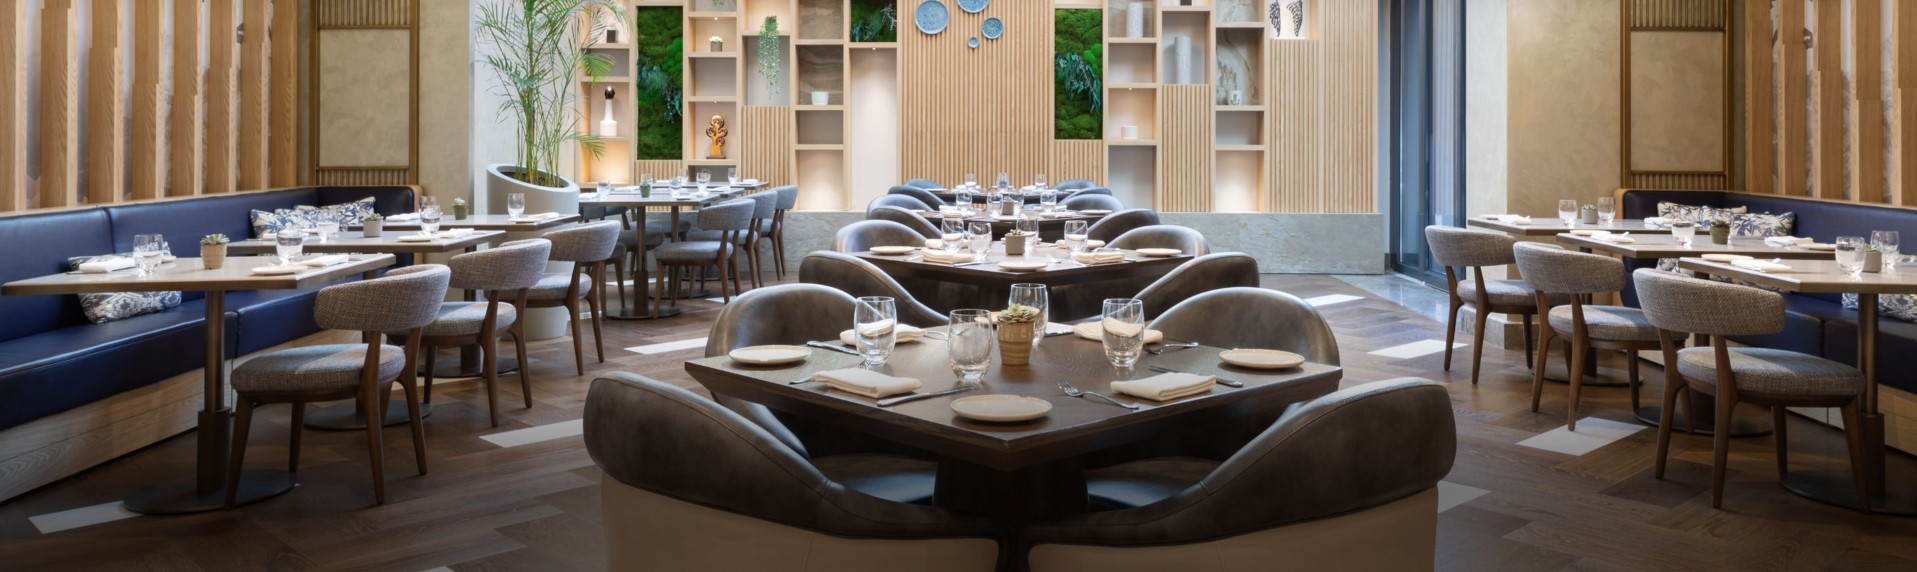

**Dataset Description: Restaurant Cuisine Classification**

**Introduction:**
This dataset is designed for developing a machine learning model to classify restaurants based on their cuisines. It includes various attributes related to restaurants such as location, average cost, ratings, and services offered. The primary objective is to predict the cuisine type of a restaurant using these attributes.

**Attributes:**

- **Restaurant ID:** Unique identifier for each restaurant.
- **Restaurant Name:** Name of the restaurant.
- **Country Code:** Country code where the restaurant is located.
- **City:** City where the restaurant is situated.
- **Address:** Address of the restaurant.
- **Locality:** General locality of the restaurant.
- **Locality Verbose:** Detailed locality description.
- **Longitude:** Longitude coordinate of the restaurant's location.
- **Latitude:** Latitude coordinate of the restaurant's location.
- **Cuisines:** Type of cuisines offered by the restaurant (target variable).
- **Average Cost for Two:** Average cost for two people dining at the restaurant.
- **Currency:** Currency used for pricing.
- **Has Table Booking:** Binary variable indicating if the restaurant accepts table bookings.
- **Has Online Delivery:** Binary variable indicating if the restaurant offers online delivery.
- **Is Delivering Now:** Binary variable indicating if the restaurant is currently delivering.
- **Switch to Order Menu:** Binary variable indicating if the restaurant has an online menu ordering option.
- **Price Range:** Range indicating the price level of the restaurant's menu items.
- **Aggregate Rating:** Average rating of the restaurant based on customer reviews.
- **Rating Color:** Color code representing the rating level.
- **Rating Text:** Textual representation of the rating level.
- **Votes:** Total number of votes received by the restaurant.

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/restaurant-dataset/Dataset .csv')

# &#128064; Dataset Review

In [3]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [4]:
# Save the original dataset
original_df = df.copy()

In [5]:
def info(df):
    explore_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    explore_df['missing_amount'] = df.isna().sum()
    explore_df['% missing'] = (df.isna().sum()/len(df)).astype(float)
    explore_df['uniques'] = df.nunique().values
    explore_df['total'] = df.count().values
    return explore_df.style.background_gradient(cmap = 'Greens')
info(df)

,dtypes,missing_amount,% missing,uniques,total
Restaurant ID,int64,0,0.000000,9551,9551
Restaurant Name,object,0,0.000000,7446,9551
Country Code,int64,0,0.000000,15,9551
City,object,0,0.000000,141,9551
Address,object,0,0.000000,8918,9551
Locality,object,0,0.000000,1208,9551
Locality Verbose,object,0,0.000000,1265,9551
Longitude,float64,0,0.000000,8120,9551
Latitude,float64,0,0.000000,8677,9551
Cuisines,object,9,0.000942,1825,9542


In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

#### Remove columns that are not useful for machine learning, such as ID, address, etc. Feature "Cuisines" are very variable, mixed and difficult to evaluate

In [7]:
df.drop(columns=['Restaurant ID', 'Restaurant Name', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',], axis = 1, inplace=True)

In [8]:
df.head(3)

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Makati City,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,162,Makati City,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,162,Mandaluyong City,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [9]:
df.describe()

,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,1199.210763,1.804837,2.666370,156.909748
std,56.750546,16121.183073,0.905609,1.516378,430.169145
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.000000,700.000000,2.000000,3.700000,131.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000


In [10]:
info(df)

,dtypes,missing_amount,% missing,uniques,total
Country Code,int64,0,0.000000,15,9551
City,object,0,0.000000,141,9551
Average Cost for two,int64,0,0.000000,140,9551
Currency,object,0,0.000000,12,9551
Has Table booking,object,0,0.000000,2,9551
Has Online delivery,object,0,0.000000,2,9551
Is delivering now,object,0,0.000000,2,9551
Switch to order menu,object,0,0.000000,1,9551
Price range,int64,0,0.000000,4,9551
Aggregate rating,float64,0,0.000000,33,9551


#### Remove empty "Aggregate rating" values

In [11]:
df['Aggregate rating'].min()

0.0

In [12]:
df[df['Aggregate rating'] == 0].count()

Country Code            2148
City                    2148
Average Cost for two    2148
Currency                2148
Has Table booking       2148
Has Online delivery     2148
Is delivering now       2148
Switch to order menu    2148
Price range             2148
Aggregate rating        2148
Rating color            2148
Rating text             2148
Votes                   2148
dtype: int64

#### As we see, 2128 restaurances don't have a rating. Drop them

In [13]:
df.drop(df[df['Aggregate rating'] == 0].index, inplace = True)

In [14]:
# the last check
info(df)

,dtypes,missing_amount,% missing,uniques,total
Country Code,int64,0,0.000000,15,7403
City,object,0,0.000000,141,7403
Average Cost for two,int64,0,0.000000,140,7403
Currency,object,0,0.000000,12,7403
Has Table booking,object,0,0.000000,2,7403
Has Online delivery,object,0,0.000000,2,7403
Is delivering now,object,0,0.000000,2,7403
Switch to order menu,object,0,0.000000,1,7403
Price range,int64,0,0.000000,4,7403
Aggregate rating,float64,0,0.000000,32,7403


# 	&#129488; Creating new features

In [15]:
print(f'Max average cost for two person: {df["Average Cost for two"].max()}')
print(f'Min average cost for two person: {df["Average Cost for two"].min()}')

Max average cost for two person: 800000
Min average cost for two person: 0


 #### Price is $0? That sounds great, but let's be realistic:

In [16]:
df.drop(df[df["Average Cost for two"] == 0].index, inplace = True)

In [17]:
# Check again
print(f'Min average cost for two person: {df["Average Cost for two"].min()}')

Min average cost for two person: 7


## 	&#127828; &#x27FA;	&#128184; The main idea is to create a group of features that unify the cost of dining out at a restaurant across all countries, considering purchasing power parity (PPP).
Purchasing power parity (PPP): https://en.wikipedia.org/wiki/Purchasing_power_parity<br>
Gross domestic product (GDR): https://en.wikipedia.org/wiki/Gross_domestic_product

In [18]:
# What Countries do we have?
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

In [19]:
# What Currency do we have?
df.Currency.value_counts()

Currency
Indian Rupees(Rs.)        6504
Dollar($)                  470
Pounds(��)                  79
Emirati Diram(AED)          60
Rand(R)                     60
Brazilian Real(R$)          55
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

#### !!!Restaurant Dataset has error: wrong currency for Philippines - Botswana Pula(P). Has to be 'Philippine peso' (₱) (PHP)!!!

In [20]:
df[df['Country Code']==14].head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
102,14,Armidale,20,Dollar($),No,No,No,No,2,3.5,Yellow,Good,25
143,14,Balingup,20,Dollar($),No,No,No,No,2,3.2,Orange,Average,21
144,14,Beechworth,20,Dollar($),No,No,No,No,2,4.6,Dark Green,Excellent,237
269,14,Dicky Beach,7,Dollar($),No,No,No,No,1,3.6,Yellow,Good,29
290,14,East Ballina,20,Dollar($),No,No,No,No,2,4.1,Green,Very Good,56


In [21]:
df[df['Country Code']==14]['City'].unique()

array(['Armidale', 'Balingup', 'Beechworth', 'Dicky Beach',
       'East Ballina', 'Flaxton', 'Forrest', 'Hepburn Springs',
       'Huskisson', 'Inverloch', 'Lakes Entrance', 'Lorn', 'Macedon',
       'Mayfield', 'Middleton Beach', 'Montville', 'Palm Cove',
       'Paynesville', 'Penola', 'Phillip Island', 'Tanunda',
       'Trentham East', 'Victor Harbor'], dtype=object)

## List of countries by GDP (PPP) per capita (Data taken from Wikipedia.)

In [22]:
# list = ['Country Code', 'Country', 'GDR','PPP','Exchange rate']
country_PPP = [[162,'Philippines', 4169, 12127, 0.018], [30,'Brazil', 11178, 20079, 0.2], 
               [216, 'US',80412, 80412, 1], [14, 'Australia', 63487, 64674, 0.66], 
               [37, 'Canada', 53247, 59813, 0.74], [184, 'Singapore', 87884, 133107, 0.74], 
               [214, 'UAE', 50602, 88961, 0.27], [1, 'India', 2850, 9183, 0.012], 
               [94, 'Indonesia', 5509, 16843, 0.000063], [148,'New Zealand', 48071, 53809, 0.6], 
               [215, 'UK', 48913, 56836, 1.26], [166, 'Qatar', 81968, 114210, 0.27], 
               [189, 'South Africa', 6426, 16625, 0.053], [191, 'Sri Lanka', 3293, 14234, 0.0033], 
               [208, 'Turkey',13383,  41887, 0.031]]

In [23]:
country_PPP_dict = {x[0]:{'Country': x[1], 'Country GDR': x[2], 'Country PPP': x[3], 'Exchange rate':x[4]} for x in country_PPP}

### Create 4 columns 'Country', 'Country GDR in \\$', 'PPP in \\$' and'Exchange rate'.


In [24]:
df['Country'] = df['Country Code'].map(lambda x: country_PPP_dict[x]['Country'])
df['Country GDR in $'] = df['Country Code'].map(lambda x: country_PPP_dict[x]['Country GDR'])
df['Country PPP in $'] = df['Country Code'].map(lambda x: country_PPP_dict[x]['Country PPP'])
df['Exchange rate'] = df['Country Code'].map(lambda x: country_PPP_dict[x]['Exchange rate'])

### Create a new feature called 'Average Cost' in dollars and estimate the daily purchasing power relative to dining out at a restaurant using GDR and PPP.

In [25]:
df['Average Cost for two $'] = round(df['Average Cost for two'] * df['Exchange rate'], 2)

In [26]:
df['% Availability (GDR)'] = round(df['Average Cost for two $'] * 365 / df['Country GDR in $'] * 100, 2)

In [27]:
df['% Availability (PPP)'] = round(df['Average Cost for two $'] * 365 / df['Country PPP in $'] * 100, 2)

In [28]:
df.head(3)

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Country GDR in $,Country PPP in $,Exchange rate,Average Cost for two $,% Availability (GDR),% Availability (PPP)
0,162,Makati City,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Philippines,4169,12127,0.018,19.8,173.35,59.59
1,162,Makati City,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Philippines,4169,12127,0.018,21.6,189.11,65.01
2,162,Mandaluyong City,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Philippines,4169,12127,0.018,72.0,630.37,216.71


## &#128181; The most expensive restaurant 

In [29]:
df['Average Cost for two $'].max()

370.0

In [30]:
df['Average Cost for two $'].idxmax()

458

In [31]:
original_df.iloc[[458]][['Restaurant Name', 'Country Code', 'City', 'Address',
       'Cuisines','Average Cost for two', 'Currency', 'Price range', 'Aggregate rating', 'Votes']]

,Restaurant Name,Country Code,City,Address,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Votes
458,Restaurant Andre,184,Singapore,41 Bukit Pasoh Road 089855,"French, Mediterranean, European",500,Dollar($),4,3.8,33


<Axes: xlabel='Average Cost for two $', ylabel='Count'>

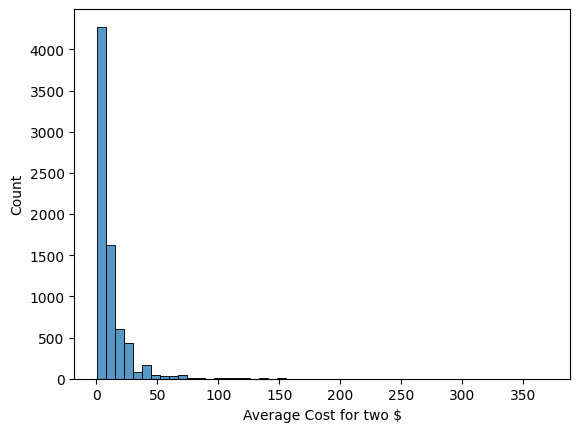

In [32]:
sns.histplot(df, x='Average Cost for two $',  bins=50)

## &#128077; Top rated restaurant 

In [33]:
# Max raiting is:
df['Votes'].idxmax()

728

In [34]:
# The most voted restaurant
original_df.iloc[[728]][['Restaurant Name', 'Country Code', 'City', 'Address',
       'Cuisines','Average Cost for two', 'Currency', 'Price range', 'Aggregate rating', 'Votes']]

,Restaurant Name,Country Code,City,Address,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Votes
728,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...","Italian, American, Pizza",2000,Indian Rupees(Rs.),4,4.8,10934


## Delivery and Reservation column estimates

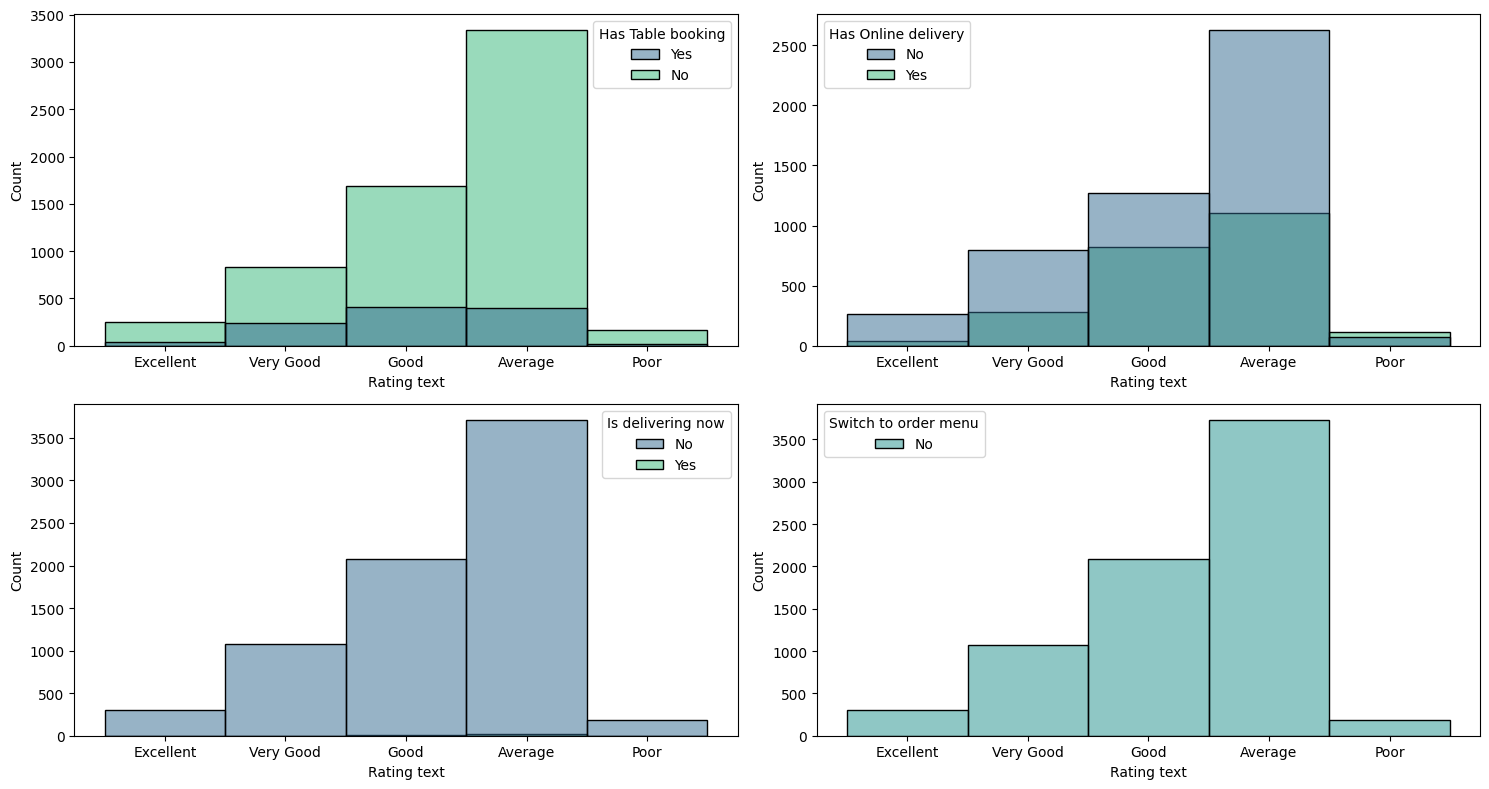

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.histplot(df, x='Rating text', palette='viridis', hue='Has Table booking', ax=axes[0, 0])
sns.histplot(df, x='Rating text', palette='viridis', hue='Has Online delivery', ax=axes[0, 1])
sns.histplot(df, x='Rating text', palette='viridis', hue='Is delivering now', ax=axes[1, 0])
sns.histplot(df, x='Rating text', palette='viridis', hue='Switch to order menu', ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [36]:
# Checking the ratio of values in the "Is delivering now"
df[['Is delivering now']].value_counts()

Is delivering now
No                   7352
Yes                    33
Name: count, dtype: int64

#### The feature "Is delivering now" is practically not utilized. <br>The feature "Switch to order menu" has a constant value and holds no meaningful information for machine learning. <br>Drop both features

In [37]:
df.drop(columns=['Is delivering now', 'Switch to order menu'], axis = 1, inplace = True)

#### and convert the features to numerical values:

In [38]:
df['Has Table booking'] = pd.get_dummies(df['Has Table booking'], drop_first = True, prefix='Has_Table_booking', dtype='int')
df['Has Online delivery'] = pd.get_dummies(df['Has Online delivery'], drop_first = True, prefix='Has Online delivery', dtype='int')

In [39]:
df[['Has Table booking', 'Has Table booking'] ]

,Has Table booking,Has Table booking
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
9546,0,0
9547,0,0
9548,0,0
9549,0,0


## Compare 'Votes', 'Rating color' and 'Rating text'	with 'Aggregate rating'

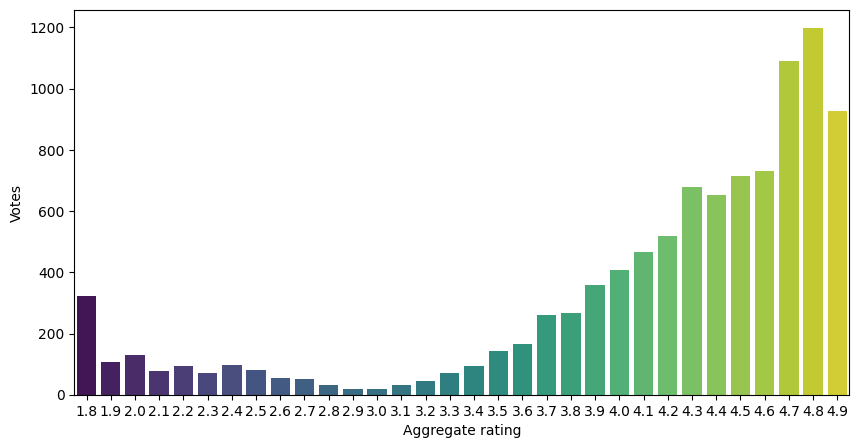

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(df,x='Aggregate rating', y = 'Votes', palette='viridis', errorbar=None)
plt.show()

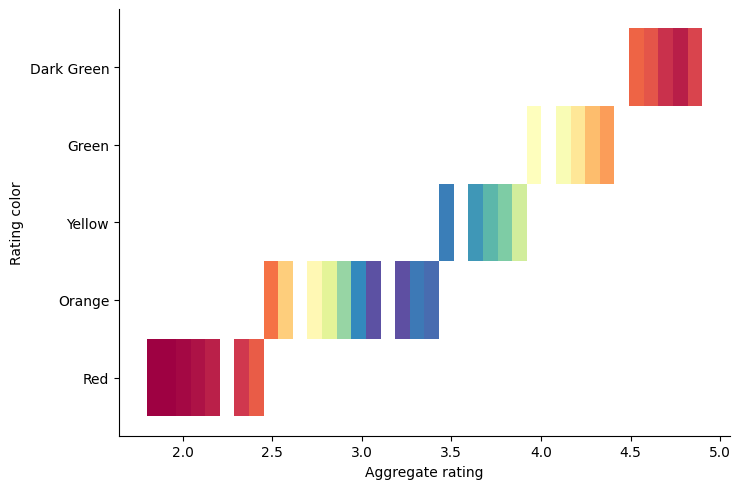

In [41]:
sns.displot(df,x='Aggregate rating', y = 'Rating color', cmap='Spectral', aspect=1.5)

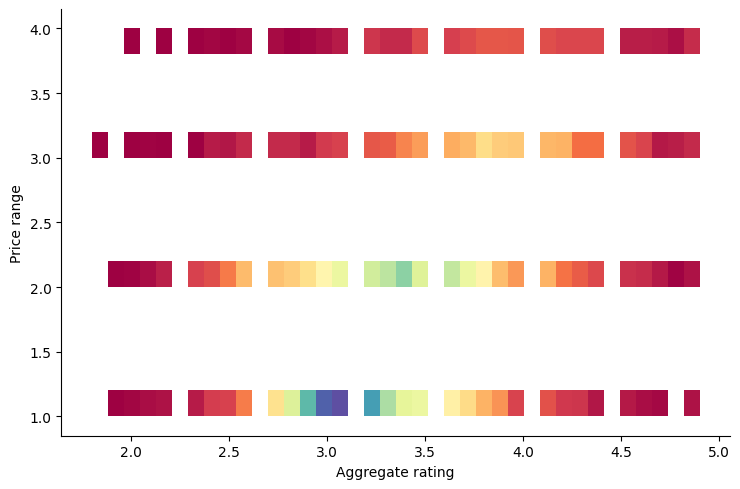

In [42]:
sns.displot(df,x='Aggregate rating', y = 'Price range', cmap='Spectral', aspect=1.5)

# 🌏 Correlation Map 

<Axes: >

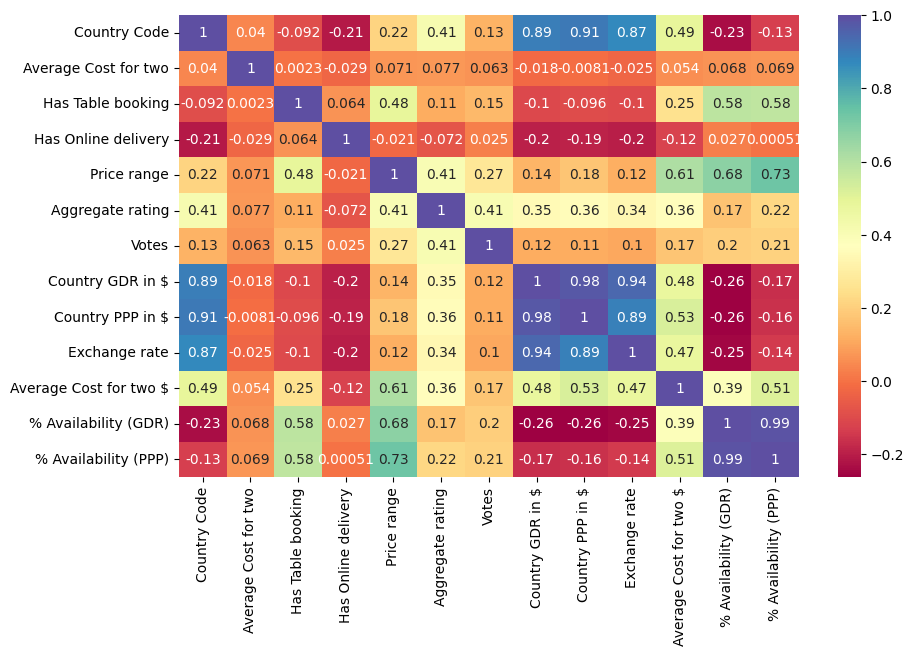

In [43]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'Spectral')

#### I'm going to choose "% Availability (PPP)" for the training set as it has a higher percentage correlation compared to "% Availability (GDR)"

## Apply one-hot encoding for the 'Country' feature.

In [44]:
df_county = pd.get_dummies(df['Country'], drop_first = False, dtype='int')

In [45]:
df_county

,Australia,Brazil,Canada,India,Indonesia,New Zealand,Philippines,Qatar,Singapore,South Africa,Sri Lanka,Turkey,UAE,UK,US
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9547,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9548,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9549,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# &#129302; Create a Training Dataset.

In [46]:
X = df[['Has Table booking', 'Has Online delivery', 'Price range',
       'Votes', 'Average Cost for two $', '% Availability (PPP)']]

In [47]:
X = pd.concat([X, df_county], axis = 1)
X

,Has Table booking,Has Online delivery,Price range,Votes,Average Cost for two $,% Availability (PPP),Australia,Brazil,Canada,India,...,New Zealand,Philippines,Qatar,Singapore,South Africa,Sri Lanka,Turkey,UAE,UK,US
0,1,0,3,314,19.80,59.59,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,3,591,21.60,65.01,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,4,270,72.00,216.71,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,4,365,27.00,81.26,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,4,229,27.00,81.26,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,3,788,2.48,2.16,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9547,0,0,3,1034,3.26,2.84,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9548,0,0,4,661,5.27,4.59,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9549,0,0,4,901,3.72,3.24,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
y = df['Aggregate rating']
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 7385, dtype: float64

# 	&#x2B10;&#x2B0E; Split and Scale the Dataset.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# &#x2B07; Import Evaluation Metrics 	

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred)
    return print(f"R2 Score: {SCORE:.4f} \nMean Absolute Error:{MAE:.4f},\nMean Squared Error:{MSE:.4f} \nRoot Mean Squared Error:{RMSE:.4f}")

# &#128170; Training Models 

# 	&#129374; Neural network (Tensor Flow)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2024-04-08 18:42:13.929653: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 18:42:13.929751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 18:42:14.051738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [55]:
#early_stop = EarlyStopping(monitor='val_loss', verbose=0, patience=10) - Turned off due to reducing accuracy.

In [56]:
X_train.shape[1]


21

In [57]:
model_nn = Sequential()

model_nn.add(Dense(21, activation = 'relu'))
model_nn.add(Dense(42, activation = 'relu'))
model_nn.add(Dense(84, activation = 'relu'))
model_nn.add(Dense(84, activation = 'relu'))
model_nn.add(Dense(42, activation = 'relu'))
model_nn.add(Dense(21, activation = 'relu'))
model_nn.add(Dense(10, activation = 'relu'))
model_nn.add(Dense(1))

model_nn.compile(optimizer = 'adam', loss = 'mse')

In [58]:
model_nn.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), epochs=200, verbose =0)

I0000 00:00:1712601748.547235      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [59]:
losses = pd.DataFrame(model_nn.history.history)

<Axes: >

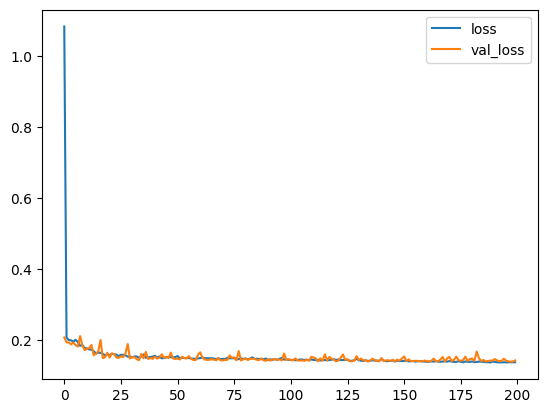

In [60]:
losses.plot()

In [61]:
prediction_nn = model_nn.predict(X_test)
evaluation_metrics(y_test, prediction_nn)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R2 Score: 0.5501 
Mean Absolute Error:0.2829,
Mean Squared Error:0.1423 
Root Mean Squared Error:0.3772


# &#129472; Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model_lr = LinearRegression()
prediction_lr = model_lr.fit(X_train, y_train).predict(X_test)
evaluation_metrics(y_test, prediction_lr)

R2 Score: 0.3972 
Mean Absolute Error:0.3433,
Mean Squared Error:0.1907 
Root Mean Squared Error:0.4366


# &#127829; Random Forest Model

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
model_rf = RandomForestRegressor()
prediction_rf = model_rf.fit(X_train, y_train).predict(X_test)
evaluation_metrics(y_test, prediction_rf)

R2 Score: 0.4679 
Mean Absolute Error:0.3026,
Mean Squared Error:0.1683 
Root Mean Squared Error:0.4102


# &#129384; Support Vector Machines Model

In [66]:
from sklearn.svm import SVR

In [67]:
model_svm = SVR()
prediction_svm = model_svm.fit(X_train, y_train).predict(X_test)
evaluation_metrics(y_test, prediction_svm)

R2 Score: 0.4357 
Mean Absolute Error:0.3278,
Mean Squared Error:0.1785 
Root Mean Squared Error:0.4225


# &#127838; XGBoost

In [68]:
from xgboost import XGBRegressor

In [69]:
model_xgb = XGBRegressor()
prediction_xgb = model_xgb.fit(X_train, y_train).predict(X_test)
evaluation_metrics(y_test, prediction_xgb)

R2 Score: 0.5335 
Mean Absolute Error:0.2846,
Mean Squared Error:0.1476 
Root Mean Squared Error:0.3841


# &#127937; &#127828; Summary of the simulation results &#127789; &#127937;

In [70]:
results = {
    'Model': ['🥇 Neural Network (TensorFlow)',' \U0001F34D Linear Regression', '🥉 Random Forest', '\U0001F349 Support Vector Machines', '🥈 XGBoost'],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2_SCORE': []
}

for model_name, pred in zip(results['Model'], [prediction_nn, prediction_lr, prediction_rf, prediction_svm, prediction_xgb]):
    results['MSE'].append(mean_squared_error(y_test, pred))
    results['RMSE'].append(np.sqrt(mean_squared_error(y_test, pred)))
    results['MAE'].append(mean_absolute_error(y_test, pred))
    results['R2_SCORE'].append(r2_score(y_test, pred))
    
results = pd.DataFrame(results)

results.sort_values(by="MSE").reset_index(drop = True).style.background_gradient(axis=None, cmap='YlGn', low=0.75, high=1.0)

,Model,MSE,RMSE,MAE,R2_SCORE
0,🥇 Neural Network (TensorFlow),0.142300,0.377227,0.282887,0.550082
1,🥈 XGBoost,0.147558,0.384133,0.284585,0.533456
2,🥉 Random Forest,0.168286,0.410227,0.302638,0.467919
3,🍉 Support Vector Machines,0.178474,0.422462,0.327792,0.435708
4,🍍 Linear Regression,0.190662,0.436648,0.343318,0.397173
